In [1]:
import os, sys, time
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
# Create timestamp to show when this summary was run
print('Summary run: ' + time.strftime("%a, %d %b %Y %H:%M"))

Summary run: Tue, 25 May 2021 16:10


In [3]:
relative_path = '../../../../outputs'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

# Traffic Counts
----
### Daily | By Facility Type

In [4]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

In [5]:
_df = df.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Arterial,"25,640,998","23,468,060","-2,172,938",-8.47%
Collector,"4,311,595","3,597,987","-713,608",-16.55%
Freeway,"28,356,427","28,355,533",-894,-0.00%
Ramp,"753,376","587,562","-165,814",-22.01%
Total,"59,062,396","56,009,142","-3,053,254",-5.17%


----
### Daily | By County

In [6]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume_county_facility.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

_df = df.groupby('county').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
county,,,,
King,"31,196,640","30,688,657","-507,983",-1.63%
Kitsap,"4,564,315","3,637,127","-927,188",-20.31%
Pierce,"13,917,538","12,783,790","-1,133,748",-8.15%
Snohomish,"9,383,903","8,899,568","-484,335",-5.16%
Total,"59,062,396","56,009,142","-3,053,254",-5.17%


----
### Daily | Scatterplots 

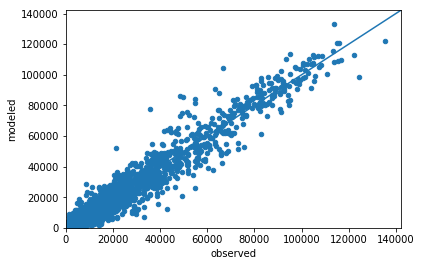

In [7]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [8]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

r^2: 0.9691977295172182


---
By County

King r^2: 0.975946502380684
Kitsap r^2: 0.9577938838768666
Pierce r^2: 0.96136551397723
Snohomish r^2: 0.9604793197075407


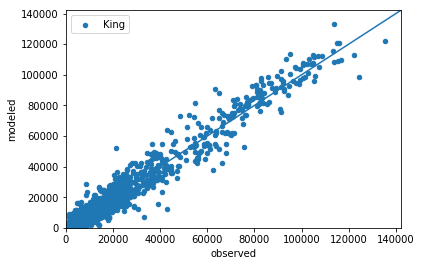

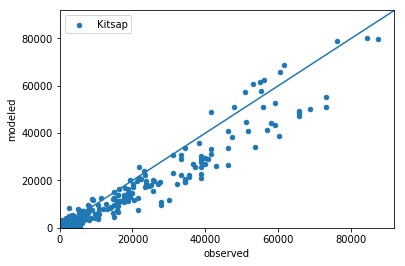

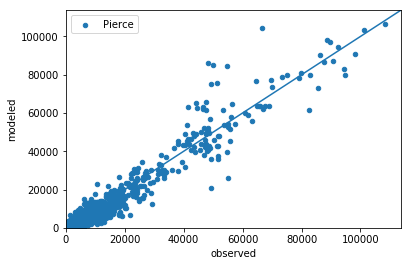

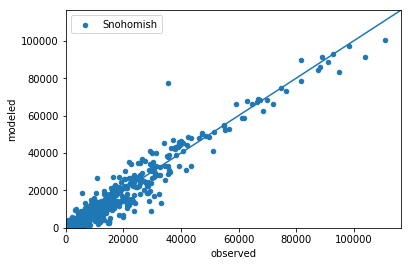

In [9]:
for county in np.unique(df['county']):
    _df = df[df['county'] == county]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=county)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    print(str(county) + ' r^2: ' + str(r_value))

---
By Facility Type

r^2 Freeway: 0.9421018837085904
r^2 Arterial: 0.8823355823095708


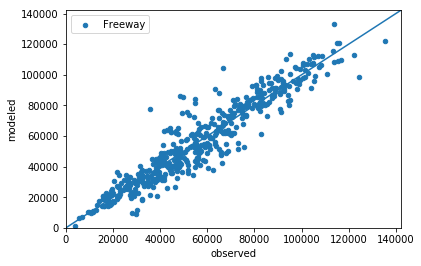

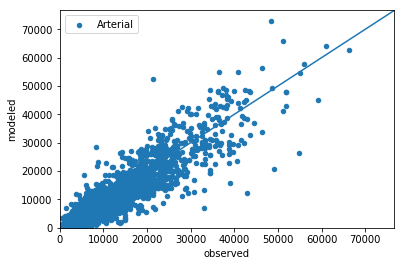

In [10]:
for factype in ['Freeway','Arterial']:
    _df = df[df['@facilitytype'] == factype]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print('r^2 ' + str(factype) + ': ' + str(r_value))

**Hourly Volumes**


r^2: 0.9243014807532139


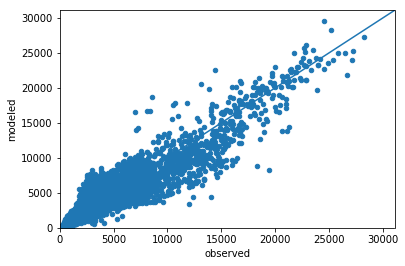

In [11]:
df = pd.read_csv(os.path.join(relative_path,'validation','hourly_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

# Screenlines

In [12]:
df = pd.read_csv(os.path.join(relative_path,'validation','screenlines.csv'))
df = df.append(df.sum(numeric_only=True), ignore_index=True)
df.at[df.index[-1], 'name'] = 'TOTAL'
#df.at['C', 'name'] = 10
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,name,observed,modeled,county,diff,percent_diff
0,AUBURN - SOUTH KING,"568,417","554,152",King,"-14,265",-2.51%
1,KENT,"550,322","523,428",King,"-26,894",-4.89%
2,SEATTLE - SOUTH OF CBD,"526,500","519,667",King,"-6,833",-1.30%
3,SHIP CANAL,"519,802","556,682",King,"36,880",7.09%
4,KIRKLAND-REDMOND,"414,120","411,112",King,"-3,008",-0.73%
5,MILL CREEK,"400,848","394,127",King,"-6,721",-1.68%
6,SOUTH BELLEVUE,"399,500","377,637",King,"-21,863",-5.47%
7,SEATTLE - NORTH,"372,000","375,007",King,"3,007",0.81%
8,TACOMA - EAST OF CBD,"312,164","333,504",Pierce,"21,340",6.84%
9,PARKLAND,"304,322","278,947",Pierce,"-25,375",-8.34%


r^2 : 0.9945982427826097


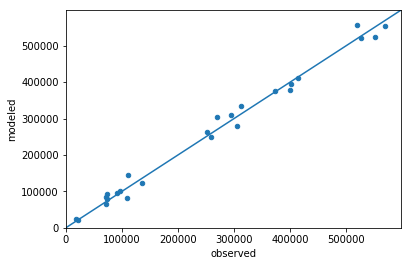

In [13]:
df = df.head(-1)
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2 : ' + str(r_value))

# Transit Boarding
----
### By Agency

In [14]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_agency.csv')

df[['observed_5to20','modeled_5to20','diff']] = df[['observed_5to20','modeled_5to20','diff']].astype('float')
df[['perc_diff']] = df[['perc_diff']].applymap(format_percent)
df.sort_values('observed_5to20', ascending=False)

,agency,observed_5to20,modeled_5to20,diff,perc_diff
2,King County Metro,"392,694","383,551","-9,143",-2.33%
5,Sound Transit,"145,426","159,431","14,006",9.63%
0,Community Transit,"30,918","33,116","2,198",7.11%
4,Pierce Transit,"27,233","35,286","8,053",29.57%
6,Washington Ferries,"16,912","12,899","-4,013",-23.73%
3,Kitsap Transit,"8,669","15,647","6,978",80.49%
1,Everett Transit,"3,290","1,728","-1,562",-47.48%


----
### Key Routes
#### Ferries

In [15]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_5to20','modeled_5to20']] = df[['observed_5to20','modeled_5to20']].astype('float')
_df = df[df['route_code'].isin([5001,5002,5003,5004,5005,5006,5007,1973,1975])].reset_index()
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df

,description,observed_5to20,modeled_5to20,diff,perc_diff
0,POF Seattle - West S,"1,356",653,-703,-51.86%
1,POF Seattle - Vashon,670,206,-464,-69.27%
2,WSF Kingston - Edmon,"1,732",202,"-1,530",-88.34%
3,WSF Bainbridge Islan,"8,857","9,720",863,9.75%
4,WSF Bremerton - Seat,"4,484","1,914","-2,570",-57.32%
5,WSF Fauntleroy - Sou,365,26,-339,-92.88%
6,WSF Vashon Island -,946,465,-481,-50.81%
7,WSF Southworth - Vas,239,238,-0,-0.12%
8,WSF Point Defiance -,289,333,45,15.58%


r^2 : 0.9495571921552957


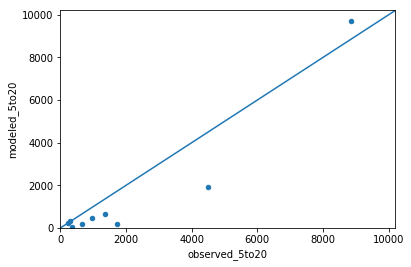

In [16]:
ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
print('r^2 ' + str('') + ': ' + str(r_value))

#### Bikes on Ferries

In [17]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'bike_ferry_boardings.csv')
df['route_code'] = df['route_code'].astype('int')
df[['route_code','description', '@bvol']].sort_values('@bvol', ascending=False)

,route_code,description,@bvol
0,1973,POF West Seattle - S,739
4,4202,POF Bremerton - Anna,579
3,4201,POF Bremerton - Pt O,545
1,1975,POF Vashon Island -,532
2,4200,POF Seattle - Bremer,471
7,5003,WSF Bremerton - Seat,395
10,5007,WSF Point Defiance -,233
8,5005,WSF Vashon Island -,218
6,5002,WSF Bainbridge Islan,209
9,5006,WSF Southworth - Vas,181


#### Rail

In [18]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_5to20','modeled_5to20']] = df[['observed_5to20','modeled_5to20']].astype('float')
_df = df[df['route_code'].isin([6996,6999,6998])].reset_index()
_df['description'] = _df['route_code'].map({6998: 'Sounder South', 6999: 'Sounder North',6996: 'Link Red Line'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)

_df

,description,observed_5to20,modeled_5to20,diff,perc_diff
0,Link Red Line,"69,383","66,360","-3,023",-4.36%
1,Sounder South,"15,356","18,006","2,650",17.26%
2,Sounder North,"1,667","2,321",654,39.25%


r^2 : 0.9989955542258506


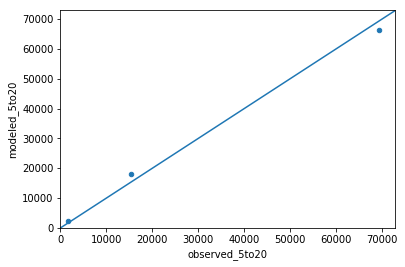

In [19]:
if len(_df) > 0: 
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print('r^2 ' + str('') + ': ' + str(r_value))

#### RapidRide, Busiest Buses, Streetcar

In [20]:
_df = df[df['route_code'].isin([1671,1672,1673,1674,1675,1676,6550,1007,1040,1997,1998])].reset_index()
_df['description'] = _df['route_code'].map({1671: 'A Line RapidRide', 1672: 'B Line RapidRide',
                                            1673: 'C Line RapidRide', 1674: 'D Line RapidRide',
                                            1675: 'E Line RapidRide', 1676: 'F Line RapidRide',
                                            6550: 'Sound Transit 550', 1040: 'KC Metro 40', 1007: 'KC Metro 7',
                                            1997: 'SLU Streetcar', 1998: 'First Hill Streetcar'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df.sort_values('modeled_5to20', ascending=False)

,description,observed_5to20,modeled_5to20,diff,perc_diff
6,E Line RapidRide,"15,336","15,092",-244,-1.59%
4,C Line RapidRide,"11,368","12,151",783,6.89%
1,KC Metro 40,"11,405","12,148",743,6.51%
10,Sound Transit 550,"9,168","11,353","2,185",23.84%
0,KC Metro 7,"10,150","9,870",-280,-2.75%
5,D Line RapidRide,"13,078","9,101","-3,977",-30.41%
2,A Line RapidRide,"8,522","7,899",-623,-7.32%
7,F Line RapidRide,"5,267","6,482","1,215",23.07%
3,B Line RapidRide,"5,914","6,031",117,1.98%
8,SLU Streetcar,"1,703","1,565",-139,-8.14%


r^2 : 0.9213031212379373


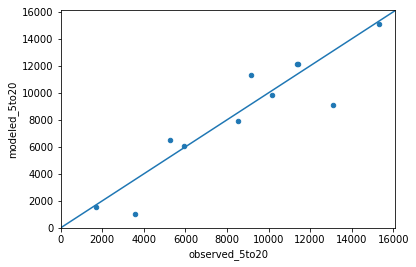

In [21]:
ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
print('r^2 ' + str('') + ': ' + str(r_value))

---
### Lines by Agency

r^2 Community Transit: 0.8987261887327841


r^2 Everett Transit: -0.37760433665689336
r^2 King County Metro: 0.9239393866988369
r^2 Kitsap Transit: 0.7983458168826951
r^2 Pierce Transit: 0.8937949384456495
r^2 Sound Transit: 0.9945377739394188
r^2 Washington Ferries: 0.9476088560028367


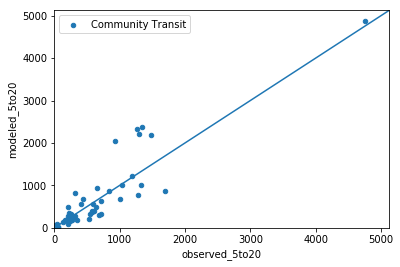

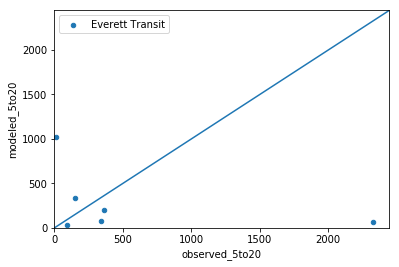

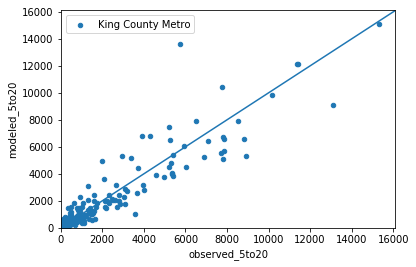

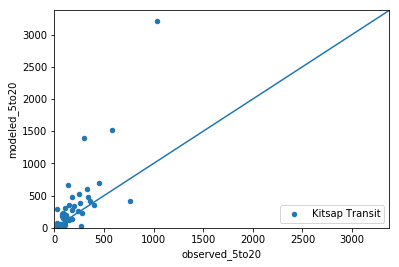

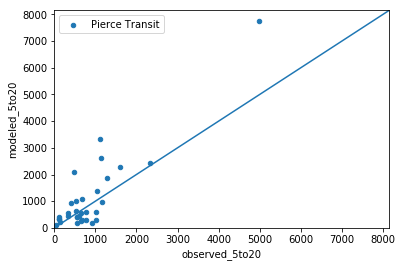

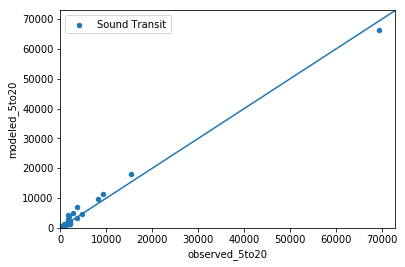

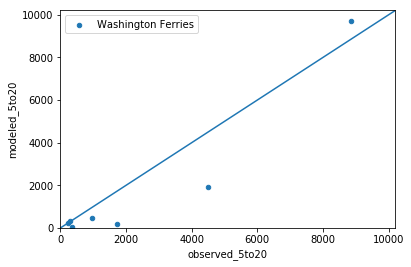

In [22]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_line.csv', index_col='agency')
df = df[-df['agency_id'].isnull()]

for agency in np.unique(df.index):
    _df = df.loc[agency,:]
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20', label=agency)
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print('r^2 ' + str(agency) + ': ' + str(r_value))

# Light Rail Station Boardings
----
Red Line

In [23]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_boardings.csv', index_col='station_name')
df['diff'] = df['modeled_5to20']-df['observed_5to20']
df['percent_diff'] = df['diff']/df['observed_5to20']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,observed_5to20,modeled_5to20,diff,percent_diff
station_name,,,,
Husky Stadium,"9,416","8,270","-1,146",-12.17%
Westlake,"10,904","7,503","-3,400",-31.18%
University St,"5,257","5,187",-70,-1.33%
Pioneer Square,"3,865","5,661","1,796",46.47%
Int'l District,"5,647","3,170","-2,477",-43.87%
Capitol Hill,"7,016","6,667",-349,-4.98%
Stadium,"1,912",758,"-1,154",-60.37%
SODO,"2,108","3,086",979,46.44%
Beacon Hill,"2,587","2,006",-582,-22.49%


Sound Transit Station Groupings

In [24]:
df_combined = df.copy()

df_combined['station_group'] = df.index
df_combined.loc[['Westlake'],'station_group'] = 'Westlake/University St'
df_combined.loc[['University St'],'station_group'] = 'Westlake/University St'

df_combined.loc[['Pioneer Square'],'station_group'] = "Pioneer Square/Int'l District"
df_combined.loc[["Int'l District"],'station_group'] = "Pioneer Square/Int'l District"

df_combined.loc[['Stadium'],'station_group'] = 'Stadium/SODO'
df_combined.loc[['SODO'],'station_group'] = 'Stadium/SODO'

df_combined.loc[['Beacon Hill'],'station_group'] = 'Beacon Hill/Mount Baker'
df_combined.loc[['Mount Baker'],'station_group'] = 'Beacon Hill/Mount Baker'

df_combined.loc[['Othello'],'station_group'] = 'Othello/Rainier Beach'
df_combined.loc[['Rainier Beach'],'station_group'] = 'Othello/Rainier Beach'

df_combined = df_combined.groupby('station_group').sum()[['observed_5to20','modeled_5to20']]
df_combined['diff'] = df_combined['modeled_5to20']-df_combined['observed_5to20']
df_combined['percent_diff'] = df_combined['diff']/df_combined['observed_5to20']
df_combined[['percent_diff']] = df_combined[['percent_diff']].applymap(format_percent)

df_combined.loc[['Husky Stadium','Capitol Hill','Westlake/University St',"Pioneer Square/Int'l District",
                 'Stadium/SODO','Beacon Hill/Mount Baker','Columbia City','Othello/Rainier Beach',
                "Tukwila Int'l Blvd",'SeaTac/Airport','Angle Lake']]

,observed_5to20,modeled_5to20,diff,percent_diff
station_group,,,,
Husky Stadium,"9,416","8,270","-1,146",-12.17%
Capitol Hill,"7,016","6,667",-349,-4.98%
Westlake/University St,"16,161","12,690","-3,470",-21.47%
Pioneer Square/Int'l District,"9,512","8,831",-681,-7.16%
Stadium/SODO,"4,020","3,844",-176,-4.37%
Beacon Hill/Mount Baker,"4,809","4,220",-589,-12.25%
Columbia City,"2,376","2,455",78,3.30%
Othello/Rainier Beach,"4,412","5,085",673,15.26%
Tukwila Int'l Blvd,"2,779","3,736",957,34.45%


# Stop Transfers

### Light Rail

In [25]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_transfers.csv', index_col='station_name')
pd.options.display.float_format = '{:0,.2f}'.format
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,modeled_transfer_rate,observed_transfer_rate,diff,percent_diff
station_name,,,,
Husky Stadium,0.43,-99.00,99.43,-100.43%
Westlake,0.41,0.36,0.05,13.20%
University St,0.50,0.20,0.30,149.59%
Pioneer Square,0.51,0.16,0.35,222.36%
Int'l District,0.72,0.45,0.27,60.23%
Capitol Hill,0.05,-99.00,99.05,-100.05%
Stadium,0.28,0.12,0.17,139.08%
SODO,0.45,0.31,0.14,43.34%
Beacon Hill,0.34,0.35,-0.02,-4.89%


# Externals

In [26]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'external_volumes.csv', index_col='location')
pd.options.display.float_format = '{:0,.0f}'.format
df = df.drop('diff', axis=1)
df['diff'] = df['modeled']-df['observed']
df = df.fillna(0)
df.loc['Total',['observed','modeled','diff']] = df[['observed','modeled','diff']].sum()
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)

df[['external_station']] = df[['external_station']].applymap('{:0.0f}'.format)
df.replace('nan', '', regex=True)

,external_station,county,observed,modeled,diff,percent_diff
location,,,,,,
I-5 to Olympia,3733,Pierce,"130,000","127,489","-2,511",-1.93%
I-5 to Mount Vernon,3744,Snohomish,"67,000","57,909","-9,091",-13.57%
I-90 @ Snoqualmie Pass,3739,King,"33,000","29,583","-3,417",-10.35%
SR-532 to Camano Island,3746,Snohomish,"23,000","20,307","-2,693",-11.71%
SR-507 to Yelm,3734,Pierce,"23,000","19,932","-3,068",-13.34%
SR-3 to Belfair,3749,Kitsap,"18,000","16,510","-1,490",-8.28%
Hood Canal Bridge,3748,Kitsap,"18,000","16,590","-1,410",-7.83%
SR-530 N/O Stanwood,3745,Snohomish,"9,100","8,445",-655,-7.19%
Mukilteo-Clinton Ferry,3747,Snohomish,"6,300","6,060",-240,-3.81%


# Corridor Speed

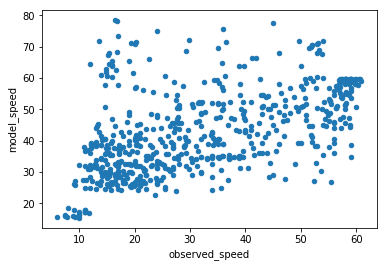

In [27]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
df.plot(kind='scatter', y='model_speed', x='observed_speed')

### AM Peak, Primary Corridors

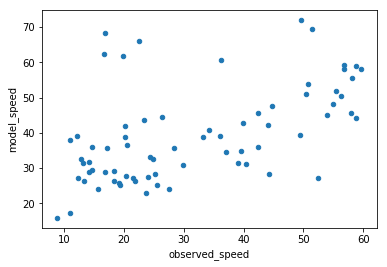

In [28]:
df[df['tod'] == '7to8'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [29]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '7to8'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
7,Seattle to Everett - NB,46,58
16,Everett to Seattle - SB,24,28
25,Tacoma to Seattle - NB,25,26
34,Seattle to Tacoma - SB,44,59
43,Bellevue to Lynnwood - NB,50,56
52,Lynnwood to Bellevue - SB,23,24
61,Tukwila to Bellevue - NB,26,19
70,Bellevue to Tukwila - SB,28,44
79,Auburn to Renton - NB,28,24
88,Renton to Auburn - SB,52,55


### PM Peak, Primary Corridors

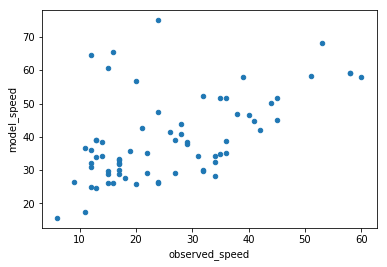

In [30]:
df[df['tod'] == '16to17'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [31]:
df[df['tod'] == '16to17'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
2,Seattle to Everett - NB,27,24
11,Everett to Seattle - SB,41,28
20,Tacoma to Seattle - NB,42,42
29,Seattle to Tacoma - SB,29,27
38,Bellevue to Lynnwood - NB,26,24
47,Lynnwood to Bellevue - SB,45,41
56,Tukwila to Bellevue - NB,30,32
65,Bellevue to Tukwila - SB,26,20
74,Auburn to Renton - NB,50,44
83,Renton to Auburn - SB,30,32
